<h1><center>Classifying Clothing Items from Fashion MNIST Dataset</center></h1>
    
<p>This notebook employs the use of neural network to classify different types of clothing items present in the Fashion MNIST Dataset. <em>Tensorflow</em> and <em>Keras</em> has been used to create the neural network for classifying the clothing images to their appropriate classes.</p>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


<h3>Fashion MNIST Dataset</h3>

<p>Fashion-MNIST is a dataset of Zalando's article images - consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale imaeg, associated with a label from 10 classes.</p>

<ul>
    <li>Class 0: T-shirt/top</li>
    <li>Class 1: Trouser</li>
    <li>Class 2: Pullover</li>
    <li>Class 3: Dress</li>
    <li>Class 4: Coat</li>
    <li>Class 5: Sandal</li>
    <li>Class 6: Shirt</li>
    <li>Class 7: Sneaker</li>
    <li>Class 8: Bag</li>
    <li>Class 9: Ankle Boot</li>
    </ul>

(60000, 28, 28)
(10000, 28, 28)


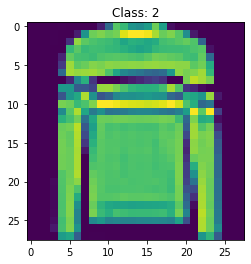

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, x_lab), (y_test,y_lab) = fashion_mnist.load_data()
print(x_train.shape)
print(y_test.shape)
plt.imshow(x_train[5])
plt.title('Class: {}'.format(x_lab[5]))
plt.show()

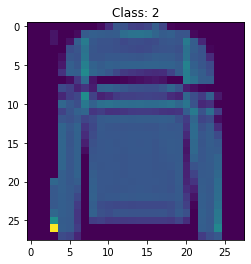

In [56]:
x_train = keras.utils.normalize(x_train, axis=1)
y_test = keras.utils.normalize(y_test, axis=1)
plt.imshow(x_train[5])
plt.title('Class: {}'.format(x_lab[5]))
plt.show()

In [57]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Flatten(input_shape = ((28,28))))
model.add(Dropout(0.05))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.05))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_______________________________________________

In [58]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, x_lab, validation_split = 0.33, epochs = 35)

Epoch 1/35
1257/1257 [==============================] - 3s 3ms/step - loss: 0.5681 - accuracy: 0.7929 - val_loss: 0.4112 - val_accuracy: 0.8498
Epoch 2/35
1257/1257 [==============================] - 3s 3ms/step - loss: 0.3996 - accuracy: 0.8505 - val_loss: 0.3835 - val_accuracy: 0.8549
Epoch 3/35
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3622 - accuracy: 0.8654 - val_loss: 0.3522 - val_accuracy: 0.8703
Epoch 4/35
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3334 - accuracy: 0.8759 - val_loss: 0.3426 - val_accuracy: 0.8754
Epoch 5/35
1257/1257 [==============================] - 3s 3ms/step - loss: 0.3162 - accuracy: 0.8815 - val_loss: 0.3427 - val_accuracy: 0.8733
Epoch 6/35
1257/1257 [==============================] - 3s 3ms/step - loss: 0.3000 - accuracy: 0.8866 - val_loss: 0.3183 - val_accuracy: 0.8858
Epoch 7/35
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2862 - accuracy: 0.8916 - val_loss: 0.3183 - val_accuracy:

In [59]:
model.evaluate(y_test,y_lab)

313/313 [==============================] - 1s 2ms/step - loss: 0.4131 - accuracy: 0.8814


[0.41314300894737244, 0.8813999891281128]

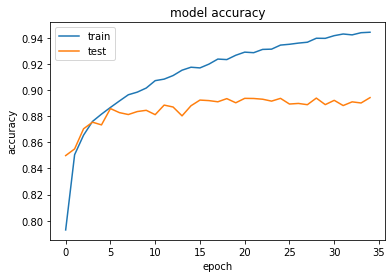

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

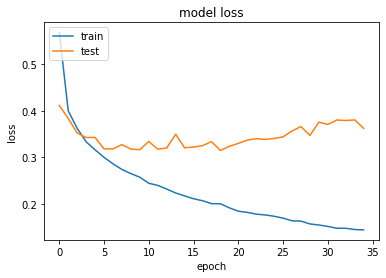

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
p = model.predict(y_test[:10])
print(p)

[[1.80042689e-12 1.51134583e-18 6.07853236e-16 4.30483343e-10
  9.45512418e-12 7.10967197e-06 2.17369661e-13 1.95887478e-05
  8.21248206e-16 9.99973297e-01]
 [5.90337186e-06 3.11017210e-16 9.99924421e-01 6.39488029e-12
  5.55664519e-05 1.77377331e-08 1.40235634e-05 4.95163077e-11
  2.72809423e-12 8.57619253e-10]
 [4.35141045e-13 1.00000000e+00 1.83435467e-16 1.21651148e-12
  1.77383661e-19 1.06962617e-17 7.89132350e-14 2.95927160e-20
  8.83768087e-21 1.46657674e-22]
 [1.44581866e-14 1.00000000e+00 3.39281363e-17 9.55583616e-12
  1.63216616e-19 5.27154652e-21 7.72639195e-14 2.35294035e-25
  3.81720982e-22 4.06351466e-26]
 [4.13740396e-01 3.86084983e-11 1.75792761e-02 1.39826598e-05
  3.82307335e-04 1.42292367e-09 5.68283916e-01 4.99955216e-11
  1.21281218e-07 3.27356232e-11]
 [2.29635866e-09 1.00000000e+00 2.01854115e-12 2.26247715e-10
  1.72640951e-14 5.72838557e-15 1.06134865e-10 9.87260522e-16
  4.41339767e-17 7.96760963e-18]
 [1.97843456e-12 1.93923766e-10 2.15911828e-02 1.69786039e

In [63]:
pred = np.argmax(p, axis = 1)
print(pred)
print(y_lab[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


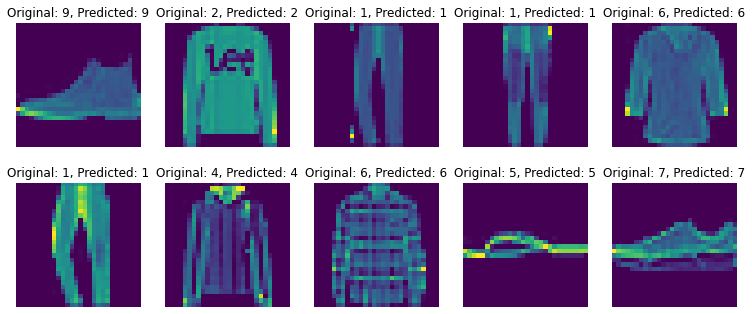

In [64]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(y_test[i])
    plt.title('Original: {}, Predicted: {}'.format(y_lab[i], pred[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1.2)
plt.show()